# Homework 5a: Airy Disks
Physics 177, Spring 2018  
**Due:** Thursday, May 3

*Jeremy Quijano*

This short homework is an exploration of the diffraction limit of a telescope. It is based on **Problem 2** of **Homework 3b** and follows
 Exercise 5.4 from *Computational Physics* by Newman.



**Reading**: On Thursday we will be discussing the *Leap Frog* algorithm for solving differential equations. Please read the relevant chapters whichever textbook you choose to use.

### Discussion
Our ability to resolve detail in astronomical observations is limited by the diffaction of light in our telescopes.  Light from stars can be treated effectively as coming from an infinitely far away point source. When this light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction patter consisting of a central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by

$$\displaystyle I(r) = \left(\frac{J_1(kr)}{kr}\right)^2 \ ,$$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k = 2\pi/\lambda$ and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. You should already have this coded up from Homework 3b.

### Plotting Diffraction Patterns

Use the equation for $I(r)$ above to plot the diffraction pattern seen, for example, by a telescope when viewing a point source at the origin. Your plot should look like an **Airy disk**:

![title](https://upload.wikimedia.org/wikipedia/commons/1/14/Airy-pattern.svg)

Image (and discussion) from:
https://en.wikipedia.org/wiki/Airy_disk

For our purposes, use $\lambda = 500~\text{nm}$. We are curious values of $r$ from zero up to $1~\mu\text{m}$. Be careful with units! (How many micrometers are there in a nanometer?) Numerical functions don't know how to handle units, so you should make sure you're consistent everywhere. 

## 1. Intensity function

Write a function `I(r)` that gives the intensity of the diffraction pattern for $\lambda = 500 \text{ nm}$. 

You should copy and paste your functions `integrate_HW3`and `J` from Homework 3b.

In [56]:
from math import pi as pi
from math import sin as sin
from math import cos as cos

def integrate_HW3(function_name, lower_limit, upper_limit, Nsteps):
    """
    Returns the integral using Simpson's rule
    """
    
    area = 0.0
    dx = (upper_limit - lower_limit) / Nsteps
    current_step = lower_limit
    
    while current_step + 2 * dx <= upper_limit:
        area += (dx/3) * (function_name(current_step) + 4*function_name(current_step + dx) + function_name(current_step + 2*dx))
        current_step += 2*dx
    
    return area

def J(m,x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    
    # Your code goes here!
    # Use the integrate_HW2 function from Problem 1
    
    # It may be useful to define a local function for the integrand
    def integrand(theta):
        return 1/pi * cos(m*theta - x*sin(theta))
    
    return integrate_HW3(integrand, 0, pi, 1000) # Can call integrate_HW3 from before instead recoding it

In [57]:
def I(r):
    kr = 2*pi*r/0.5
    return (J(1,kr)/kr)**2

In [58]:
# TEST YOUR FUNCTION
# This should be 0.0011426
print(I(.5))

0.0011211468271784967


## 2. 1D Intensity Plot 

Plot `I(r)` from $r = 0.3\, \mu\text{m}$ to $r = 1\,\mu\text{m}$. Use the numpy to vectorize `I(r)`. 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

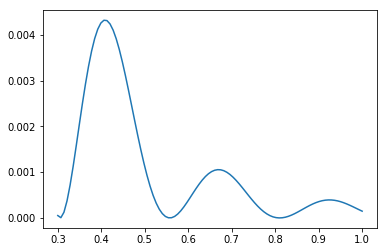

In [64]:
r = np.linspace(0.3,1,100)

intensity_vector = np.vectorize(I)

plt.plot(r,intensity_vector(r))
plt.show()

## X. Extra Credit: 2D plot

Use `meshgrid` and `pcolormesh` from `numpy` to reproduce the Airy disk image at the top of this document. Plot $I(r)$ over $(x,y) \in (-1\,\mu\text{m},1\,\mu\text{m})$.

**Hint**: the plot is a little tricky because the $r\approx 0$ region is so bright. You can solve this by using the `vmax` option in `pcolormesh`. Here's a part of my code that seemed to work:

```python
II = Ivector(np.sqrt(X**2 + Y**2))
plt.pcolormesh(X,Y,II, vmax=0.001)

```

I used `linspace` from `numpy` to sample $x,y \in (-1,1)$ over 50 steps. Then I used `meshgrid` to write `X` and `Y` arrays. Note that `X` and `Y` will be $50\times 50$ arrays. The function `Ivector` is my vectorized version of $I(r)$ using `vectorize`.

In [8]:
# FILL THIS IN, MAKE A PLOT!